### Read in and analyze data from Wenhan and Harvey's optimization codes
Note: this program assumes that the data will be in a the same directory as the "Data" directory which holds all of the data from these runs.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import datetime
import pytz
import pickle
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.dpi']=200
plt.rcParams['font.family'] = 'Serif'

In [2]:
def savePNG(pngname): 
    plt.savefig(pngname+".png", bbox_inches="tight", facecolor='w')
symbols = ['o','X','s','v','p','P','*','h','<','3','d','x','+']

In [3]:
def load_data(filename):
    with open(filename) as datafile:
        content = datafile.readlines()
        data = np.array([np.fromstring(c, sep=' ') for c in content])
    return data

In [40]:
data1 = load_data('Data/montitor_1645427814')
data2 = load_data('Data/monitor_file_wenhan_1645436371')
data3 = load_data('Data/montitor_1645441443')
data4 = load_data('Data/monitor_file_wenhan_1645450109')
data5 = load_data('Data/montitor_1645455965')
data6 = load_data('Data/monitor_file_wenhan_1645463312')

data7 = load_data('Data/montitor_1645472507')
data8 = load_data('Data/monitor_file_wenhan_1645479407')
data9 = load_data('Data/montitor_1645484506')
data10 = load_data('Data/monitor_file_wenhan_1645490866')
data11 = load_data('Data/montitor_1645492519')
data12 = load_data('Data/monitor_file_wenhan_1645492547')
data13 = load_data('Data/montitor_1645498279')
data14 = load_data('Data/monitor_file_wenhan_1645505328')

# other data

otherdata = []
otherdata.append(load_data('Data/montitor_1645212011'))
otherdata.append(load_data('Data/montitor_1645265696'))
otherdata.append(load_data('Data/montitor_1645283336'))
otherdata.append(load_data('Data/montitor_1645335499'))

otherdata.append(load_data('Data/montitor_1645344225'))
otherdata.append(load_data('Data/montitor_1645360860'))
otherdata.append(load_data('Data/montitor_1645375721'))
otherdata.append(load_data('Data/montitor_1645401197'))
otherdata.append(load_data('Data/montitor_1645411103'))

dataset = {1:data1, 2:data2, 3:data3, 4:data4, 5:data5, 6:data6, 7:data7, 8:data8, 9:data9, 10:data10, 11:data11, 12:data12, 13:data13, 14:data14}

nd = len(dataset)
for i, d in enumerate(otherdata):
    dataset[nd+i] = d

In [5]:
dataset[11]

array([], dtype=float64)

In [6]:
labels = ['loop time [s]','wall time [s]',r'beam current [$\mu$A]','drain current [mA]','bias current[mA]',
          r'P$_\mathrm{inj}$ [torr]',r'P$_\mathrm{ext}$ [torr]',
          r'I$_\mathrm{inj}$ [A]',r'I$_\mathrm{ext}$ [A]',r'I$_\mathrm{mid}$ [A]',r'I$_\mathrm{sext}$ [A]',
          'xray Src']

P$_\mathrm{ext}$ [torr]


Text(0, 0.5, 'xray Src')

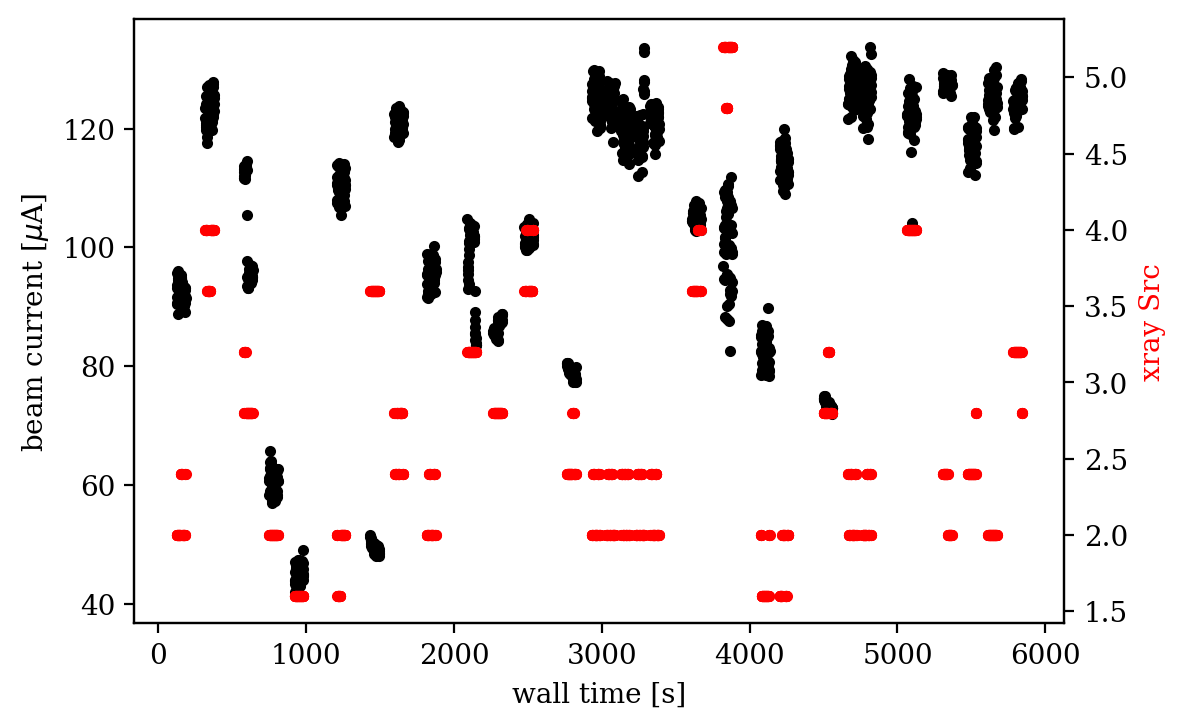

In [7]:
# plot time history

# 0: tloop 1: t wall, 2:Ifc, 3: drain I, 4: bias I, 5:Pinj, 6:Pext, 7:Iinj, 8:Iext, 9:Imid, 10:Isext, 11:xrayS
setnum = 4
if setnum==1: data=data1*1
if setnum==2: data=data2*1
if setnum==3: data=data3*1
if setnum==4: data=data4*1
if setnum==5: data=data5*1
if setnum==6: data=data6*1
if setnum==7: data=data7*1
if setnum==8: data=data8*1
if setnum==9: data=data9*1
if setnum==10: data=data10*1
if setnum==11: data=data11*1
if setnum==12: data=data12*1

xindex = 1
yindex1 = 2
yindex2 = 11

fig, ax1 = plt.subplots()
if yindex2>=0: two = 1
if two == 1: ax2 = ax1.twinx()

ax1.plot(data[:,xindex],data[:,yindex1],'k.')
if two==1:
    ax2.plot(data[:,xindex],data[:,yindex2],'r.')

ax1.set_xlabel(labels[xindex])
ax1.set_ylabel(labels[yindex1])
print((labels[6]))
ax2.set_ylabel(labels[yindex2],color='r')
#ax1.set_ylim([0,160])
#if 0: savePNG('07_InjectionPressureVsRunNum')

In [8]:
inewset=np.where(np.diff(data[:,0])<0)[0]

In [9]:
beam_ave=[]
beam_std=[]

yindex = 2
for i in range(len(inewset)):
    iend=inewset[i]+1
    if i==0: istart=0
    beam_ave.append(np.mean(data[istart:iend,yindex]))
    beam_std.append(np.std(data[istart:iend,yindex]))
    istart=iend

<ErrorbarContainer object of 3 artists>

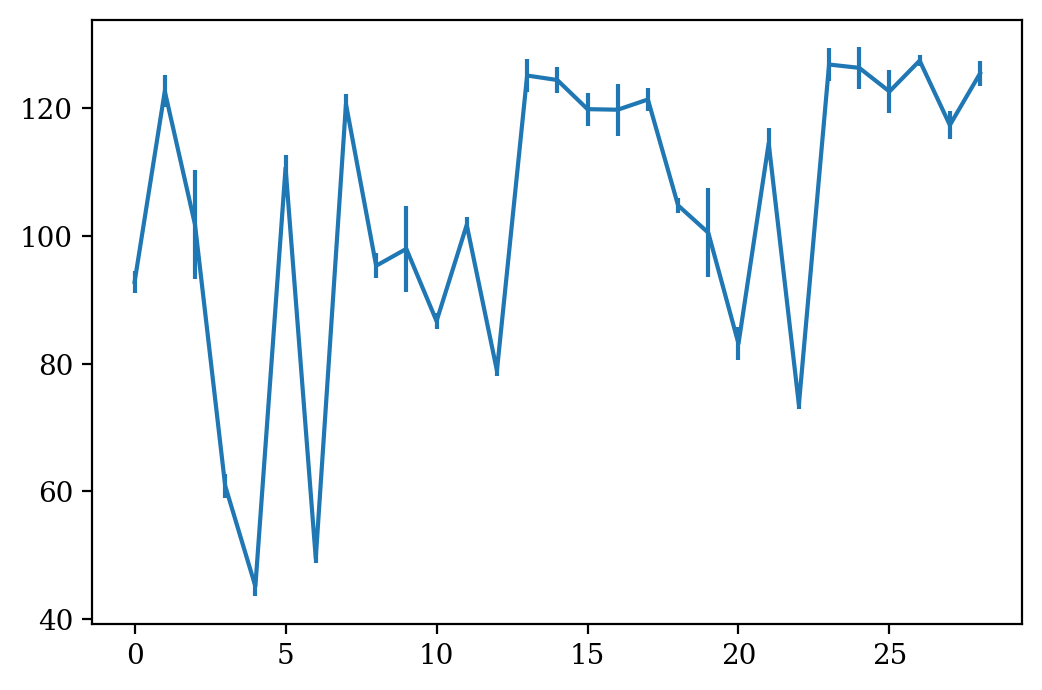

In [10]:
plt.errorbar(np.arange(len(inewset)),beam_ave,yerr=beam_std)

In [46]:
# 0: tloop 1: t wall, 2:Ifc, 3: drain I, 4: bias I, 5:Pinj, 6:Pext, 7:Iinj, 8:Iext, 9:Imid, 10:Isext, 11:xrayS
# inj: 117,127, ext: 100,110, mid: 97,107
runs = []
for i in range(1,len(dataset)+1):
    name = 'Harvey' if i%2 else 'Wenhan'
    runs.append('C%d: '%i+name)

def gen_plot(setnum, show=False):
    data = dataset[setnum]*1
    try:
        inewset=np.where(np.diff(data[:,0])<0)[0]
    except:
        return

    xpts=[]
    ypts=[]
    zpts=[]
    sizepts=[]
    magpts=[]

    xi = 9
    yi = 8
    zi = 7
    szi = -1
    mgi = 2
    for i in range(len(inewset)):
        iend=inewset[i]+1
        if i==0: istart=0
        xpts.append(np.mean(data[istart:iend,xi]))
        ypts.append(np.mean(data[istart:iend,yi]))
        zpts.append(np.mean(data[istart:iend,zi]))
        sizepts.append(i)
        magpts.append(np.mean(data[istart:iend,mgi]))
        istart=iend
    
    # plotting
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')

    # seperate the best from the rest
    bi = np.argmax(magpts) # best i
    xr, yr, zr, sr, mr = xpts[:],  ypts[:],  zpts[:], sizepts[:], magpts[:]
    xb, yb, zb, sb, mb = xr.pop(bi),  yr.pop(bi),  zr.pop(bi), sr.pop(bi), mr.pop(bi)
    
    if show:
        print(mb)
    
    graph = ax.scatter(xr, yr, zr,s=(np.array(sr)/1.5)**1.5,
               c=mr, vmin=20,vmax=155, linewidths=1, alpha=.7)
    ax.scatter(xb, yb, zb, s=(sb/1.5)**1.5, 
               c=mb, vmin=20,vmax=155, edgecolor='red', linewidths=1, alpha=.7)

    cbar = fig.colorbar(graph)
    cbar.set_label(r'O$^{7+}$ current [$\mu$A]')
    ax.set_xlabel('middle coil current [A]')
    ax.set_ylabel('extraction coil current [A]')
    ax.set_zlabel('other coil current [A]')

    ax.set_xlim([97,110])
    ax.set_ylim([97,110])
    ax.set_zlim([116,128])

    plt.title(runs[setnum-1])
    savePNG('C'+str(setnum))
    if show:
        plt.show()

In [48]:
# gen_plot(16, show=True)

In [50]:
# for i in range(1,len(dataset)+1):
#     gen_plot(i)

In [42]:
xpts=[]
ypts=[]
zpts=[]
sizepts=[]
magpts=[]

xi = 9
yi = 8
zi = 7
szi = -1
mgi = 2

for setnum in range(1, len(dataset)+1):
    data = dataset[setnum]*1
    try:
        inewset=np.where(np.diff(data[:,0])<0)[0]
    except:
        continue

    for i in range(len(inewset)):
        iend=inewset[i]+1
        if i==0: istart=0
        xpts.append(np.mean(data[istart:iend,xi]))
        ypts.append(np.mean(data[istart:iend,yi]))
        zpts.append(np.mean(data[istart:iend,zi]))
        sizepts.append(i)
        magpts.append(np.mean(data[istart:iend,mgi]))
        istart=iend

## Data Saving

In [43]:
# save all data
data_list = [xpts, ypts, zpts, sizepts, magpts]
open_file = open("Data/data.pkl", "wb")
pickle.dump(data_list, open_file)
open_file.close()

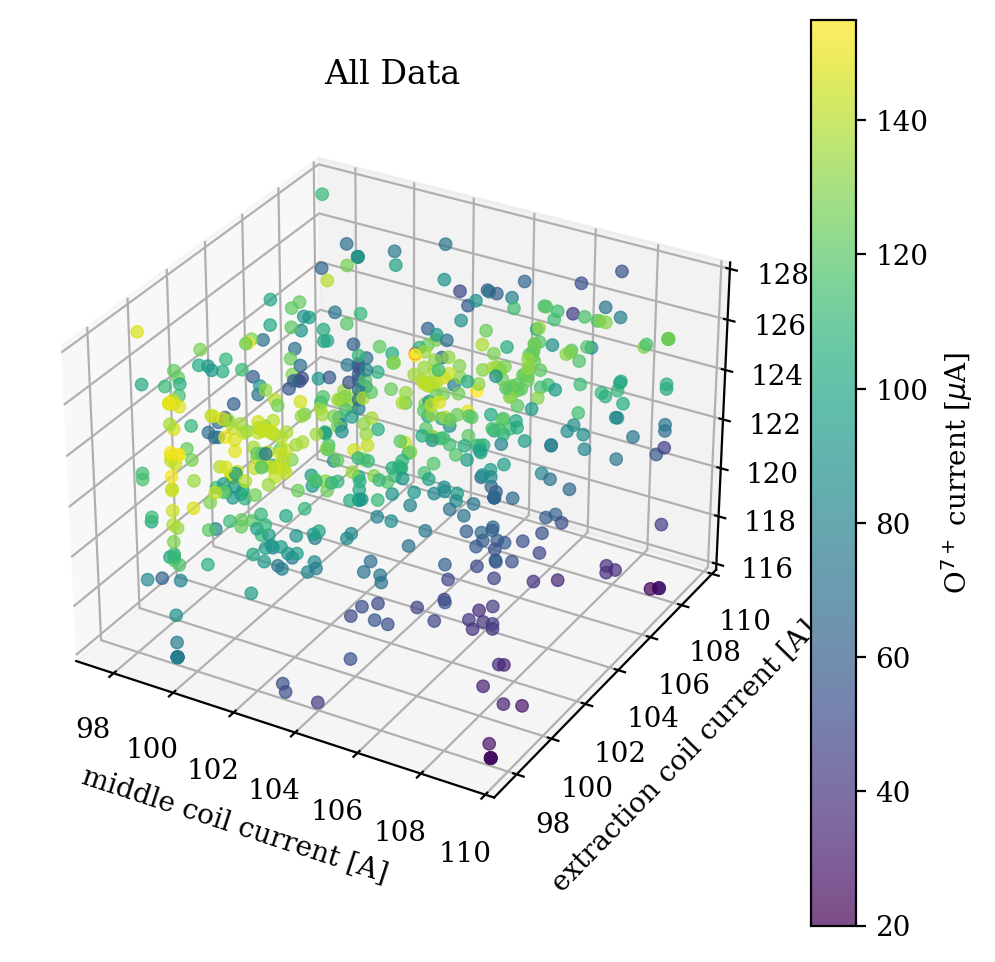

In [44]:
# plotting
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# seperate the best from the rest
bi = np.argmax(magpts) # best i
xr, yr, zr, sr, mr = xpts[:],  ypts[:],  zpts[:], sizepts[:], magpts[:]
xb, yb, zb, sb, mb = xr.pop(bi),  yr.pop(bi),  zr.pop(bi), sr.pop(bi), mr.pop(bi)

graph = ax.scatter(xr, yr, zr,
           c=mr, vmin=20,vmax=155, linewidths=0.5, alpha=.7)
ax.scatter(xb, yb, zb, 
           c=mb, vmin=20,vmax=155, edgecolor='red', linewidths=0.5, alpha=.7)

cbar = fig.colorbar(graph)
cbar.set_label(r'O$^{7+}$ current [$\mu$A]')
ax.set_xlabel('middle coil current [A]')
ax.set_ylabel('extraction coil current [A]')
ax.set_zlabel('other coil current [A]')

ax.set_xlim([97,110])
ax.set_ylim([97,110])
ax.set_zlim([116,128])

plt.title("All Data")
savePNG('All Data')
plt.show()